In [2]:
import pandas as pd

import re
import os
import matplotlib.pyplot as plt

In [2]:
# def extract_profiler_data(file_path):
#     with open(file_path, 'r') as file:
#         content = file.read()

#     excl_pattern = re.compile(
#         r"Name\s+NCalls\s+Excl\. Min\s+Excl\. Avg\s+Excl\. Max\s+Max %\n"
#         r"-+\n"
#         r"((?:.+\n)+)"
#         r"-+", re.MULTILINE
#     )
#     excl_match = excl_pattern.search(content)
#     excl_table_data = excl_match.group(1).strip() if excl_match else ""


#     incl_pattern = re.compile(
#         r"Name\s+NCalls\s+Incl\. Min\s+Incl\. Avg\s+Incl\. Max\s+Max %\n"
#         r"-+\n"
#         r"((?:.+\n)+)"
#         r"-+", re.MULTILINE
#     )
#     incl_match = incl_pattern.search(content)
#     incl_table_data = incl_match.group(1).strip() if incl_match else ""

#     # knapsack_eff_pattern = re.compile(r"KNAPSACK efficiency:\s+([\d\.]+)")
#     # knapsack_eff_match = knapsack_eff_pattern.search(content)
#     # knapsack_efficiency = float(knapsack_eff_match.group(1)) if knapsack_eff_match else None


#     # sfc_eff_pattern = re.compile(r"SFC efficiency:\s+([\d\.]+)")
#     # sfc_eff_match = sfc_eff_pattern.search(content)
#     # sfc_efficiency = float(sfc_eff_match.group(1)) if sfc_eff_match else None


#     def parse_table(table_data, columns):
#         rows = table_data.strip().split("\n")
#         data = []
#         for row in rows:
#             parts = re.split(r'\s{2,}', row.strip())
#             data.append(dict(zip(columns, parts)))
#         return data

#     excl_columns = ['Name', 'NCalls', 'Excl. Min', 'Excl. Avg', 'Excl. Max', 'Max %']
#     incl_columns = ['Name', 'NCalls', 'Incl. Min', 'Incl. Avg', 'Incl. Max', 'Max %']

#     excl_data = parse_table(excl_table_data, excl_columns)
#     incl_data = parse_table(incl_table_data, incl_columns)

#     df_excl = pd.DataFrame(excl_data)
#     df_incl = pd.DataFrame(incl_data)

#     return df_excl, df_incl, knapsack_efficiency, sfc_efficiency

In [3]:
# def extract_from_multiple_files(files, output_file):
#     with pd.ExcelWriter(output_file) as writer:
#         for file_path in files:
#             file_name = os.path.basename(file_path).replace('.txt', '')  
#             df_excl, df_incl = extract_profiler_data(file_path)
            
        
#             excl_sheet_name = f'{file_name}_Excl'
#             incl_sheet_name = f'{file_name}_Incl'
            
#             df_excl.to_excel(writer, sheet_name=excl_sheet_name, index=False)
#             df_incl.to_excel(writer, sheet_name=incl_sheet_name, index=False)

In [4]:
# def extract_from_multiple_files(files, output_file):
#     efficiency_data = []  
#     with pd.ExcelWriter(output_file) as writer:
#         for file_path in files:
#             file_name = os.path.basename(file_path).replace('.txt', '')  
#             df_excl, df_incl, knapsack_efficiency, sfc_efficiency = extract_profiler_data(file_path)
            
#             excl_sheet_name = f'{file_name}_Excl'
#             incl_sheet_name = f'{file_name}_Incl'
            
#             df_excl.to_excel(writer, sheet_name=excl_sheet_name, index=False)
#             df_incl.to_excel(writer, sheet_name=incl_sheet_name, index=False)
#             efficiency_data.append({
#                 'File': file_name,
#                 'Knapsack Efficiency': knapsack_efficiency,
#                 'SFC Efficiency': sfc_efficiency
#             })

#         df_efficiency = pd.DataFrame(efficiency_data)
#         df_efficiency.to_excel(writer, sheet_name='Efficiency_Data', index=False)

In [5]:
# files = ['./output/2_8_output.txt', './output/2_16_output.txt','./output/2_32_output.txt',
# './output/4_16_output.txt','./output/4_32_output.txt','./output/4_64_output.txt','./output/8_32_output.txt'
# ,'./output/8_64_output.txt','./output/8_128_output.txt','./output/16_64_output.txt','./output/16_128_output.txt'
# ,'./output/16_256_output.txt','./output/32_128_output.txt','./output/32_256_output.txt','./output/32_512_output.txt',
# './output/64_256_output.txt','./output/64_512_output.txt','./output/64_1024_output.txt','./output/128_512_output.txt',
# './output/128_1024_output.txt','./output/128_2048_output.txt']  



# output_excel_file = './output/all_profiler_data.xlsx'

In [6]:
# extract_from_multiple_files(files, output_excel_file)

# Plotting SFC and Knapsack profiler data

In [3]:
def load_excl_data(file_path):
    excel_data = pd.ExcelFile(file_path)

    combined_data = []  


    for sheet_name in excel_data.sheet_names:
   
        if 'Excl' in sheet_name:
      
            sheet_df = pd.read_excel(excel_data, sheet_name=sheet_name)
            sheet_df['Max %'] = sheet_df['Max %'].astype(str)
            output_size = sheet_name.split('_Excl')[0]
        
            sheet_df['Output'] = output_size
            sheet_df['Type'] = 'Excl. Avg'
            
            combined_data.append(sheet_df)
    return pd.concat(combined_data, ignore_index=True)

file_path = './output/all_profiler_data.xlsx'  
excl_data = load_excl_data(file_path)

# incl_data['Incl. Avg'] = pd.to_numeric(incl_data['Incl. Avg'], errors='coerce')

print(excl_data.head())  

                    Name  NCalls  Excl. Min  Excl. Avg  Excl. Max   Max %  \
0                   main       1   0.004662   0.004662   0.004662  64.97%   
1         KnapSackDoIt()       1   0.001259   0.001259   0.001259  17.54%   
2  SFCProcessorMapDoIt()       1   0.000695   0.000695   0.000695   9.69%   
3     painterPartition()       1   0.000530   0.000530   0.000530   7.39%   
4             knapsack()       1   0.000011   0.000011   0.000011   0.15%   

                Output       Type  
0  2_4_output.31141652  Excl. Avg  
1  2_4_output.31141652  Excl. Avg  
2  2_4_output.31141652  Excl. Avg  
3  2_4_output.31141652  Excl. Avg  
4  2_4_output.31141652  Excl. Avg  


In [ ]:
excl_data

,Name,NCalls,Excl. Min,Excl. Avg,Excl. Max,Max %,Output,Type
0,SFCProcessorMapDoItCombined(),1,0.019670,0.019670,0.019670,71.42%,2_8_output,Excl. Avg
1,Distribute(),1,0.004697,0.004697,0.004697,17.05%,2_8_output,Excl. Avg
2,main,1,0.003147,0.003147,0.003147,11.43%,2_8_output,Excl. Avg
3,knapsack(),2,0.000009,0.000009,0.000009,0.03%,2_8_output,Excl. Avg
4,SFCProcessorMapDoItCombined(),1,0.040120,0.040120,0.040120,68.17%,2_16_output,Excl. Avg
...,...,...,...,...,...,...,...,...
96,SFCProcessorMapDoItCombined(),1,2.355000,2.355000,2.355000,69.60%,128_2048_output,Excl. Avg
97,Distribute(),1,0.696700,0.696700,0.696700,20.59%,128_2048_output,Excl. Avg
98,main,1,0.332000,0.332000,0.332000,9.81%,128_2048_output,Excl. Avg
99,knapsack(),128,0.000221,0.000221,0.000221,0.01%,128_2048_output,Excl. Avg


In [ ]:
excl_data['Max %'] = excl_data['Max %'].str.rstrip('%').astype(float)

In [ ]:
excl_data.head(50)

,Name,NCalls,Excl. Min,Excl. Avg,Excl. Max,Max %,Output,Type
0,SFCProcessorMapDoItCombined(),1,1.967000e-02,1.967000e-02,1.967000e-02,71.42,2_8_output,Excl. Avg
1,Distribute(),1,4.697000e-03,4.697000e-03,4.697000e-03,17.05,2_8_output,Excl. Avg
2,main,1,3.147000e-03,3.147000e-03,3.147000e-03,11.43,2_8_output,Excl. Avg
3,knapsack(),2,8.647000e-06,8.647000e-06,8.647000e-06,0.03,2_8_output,Excl. Avg
4,SFCProcessorMapDoItCombined(),1,4.012000e-02,4.012000e-02,4.012000e-02,68.17,2_16_output,Excl. Avg
5,Distribute(),1,1.248000e-02,1.248000e-02,1.248000e-02,21.21,2_16_output,Excl. Avg
6,main,1,6.221000e-03,6.221000e-03,6.221000e-03,10.57,2_16_output,Excl. Avg
7,knapsack(),2,9.137000e-06,9.137000e-06,9.137000e-06,0.02,2_16_output,Excl. Avg
8,SFCProcessorMapDoItCombined(),1,4.930000e-02,4.930000e-02,4.930000e-02,66.80,2_32_output,Excl. Avg
9,Distribute(),1,1.568000e-02,1.568000e-02,1.568000e-02,21.25,2_32_output,Excl. Avg


In [ ]:
nan_values = excl_data.isna().sum()

In [ ]:
print(nan_values)

Name         0
NCalls       0
Excl. Min    0
Excl. Avg    0
Excl. Max    0
Max %        0
Output       0
Type         0
dtype: int64


In [ ]:
# rows_with_nan = incl_data[incl_data.isna().any(axis=1)]

In [ ]:
# print(rows_with_nan)


In [ ]:

excl_data['Max %'] = pd.to_numeric(excl_data['Max %'], errors='coerce')
excl_data['Max %'] = excl_data['Max %'] / 100
print(excl_data[['Max %']].head())


    Max %
0  0.7142
1  0.1705
2  0.1143
3  0.0003
4  0.6817


In [ ]:
excl_data

,Name,NCalls,Excl. Min,Excl. Avg,Excl. Max,Max %,Output,Type
0,SFCProcessorMapDoItCombined(),1,0.019670,0.019670,0.019670,0.7142,2_8_output,Excl. Avg
1,Distribute(),1,0.004697,0.004697,0.004697,0.1705,2_8_output,Excl. Avg
2,main,1,0.003147,0.003147,0.003147,0.1143,2_8_output,Excl. Avg
3,knapsack(),2,0.000009,0.000009,0.000009,0.0003,2_8_output,Excl. Avg
4,SFCProcessorMapDoItCombined(),1,0.040120,0.040120,0.040120,0.6817,2_16_output,Excl. Avg
...,...,...,...,...,...,...,...,...
96,SFCProcessorMapDoItCombined(),1,2.355000,2.355000,2.355000,0.6960,128_2048_output,Excl. Avg
97,Distribute(),1,0.696700,0.696700,0.696700,0.2059,128_2048_output,Excl. Avg
98,main,1,0.332000,0.332000,0.332000,0.0981,128_2048_output,Excl. Avg
99,knapsack(),128,0.000221,0.000221,0.000221,0.0001,128_2048_output,Excl. Avg


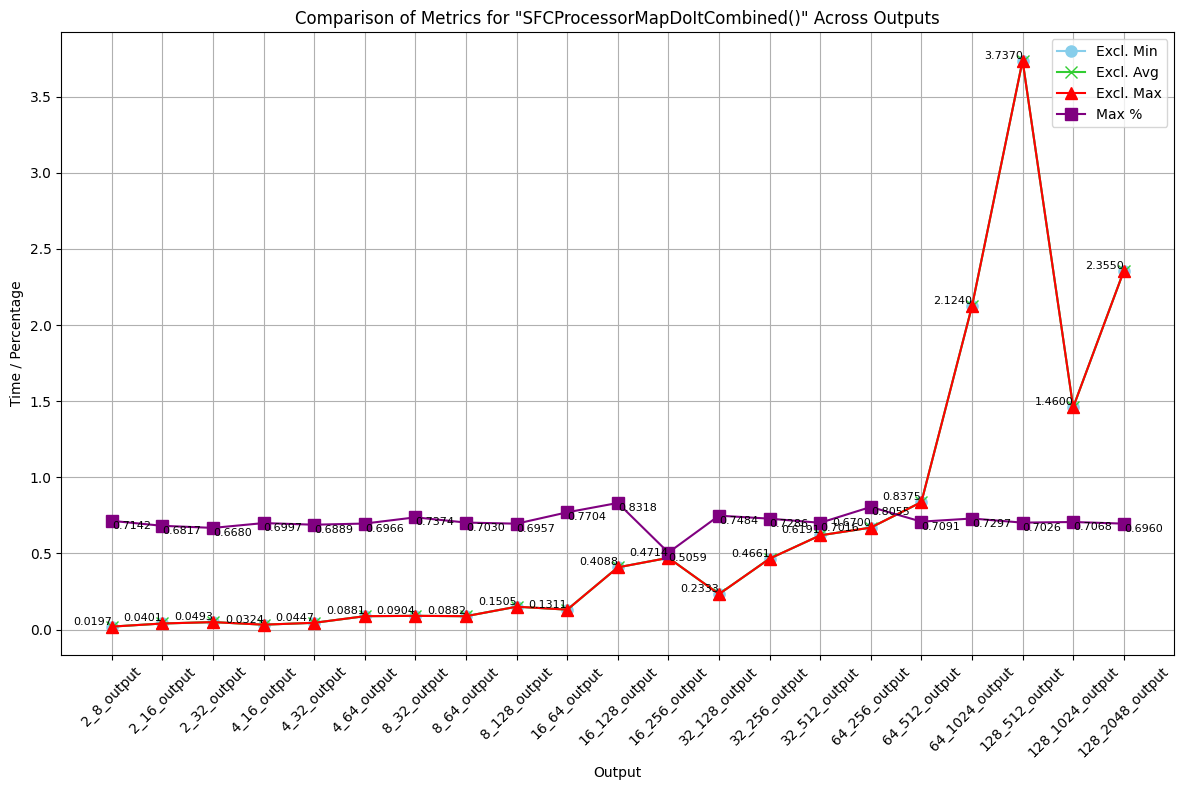

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

main_data = excl_data[excl_data['Name'] == 'SFCProcessorMapDoItCombined()'].copy()  
main_data.loc[:, 'Excl. Min'] = pd.to_numeric(main_data['Excl. Min'], errors='coerce')
main_data.loc[:, 'Excl. Avg'] = pd.to_numeric(main_data['Excl. Avg'], errors='coerce')
main_data.loc[:, 'Excl. Max'] = pd.to_numeric(main_data['Excl. Max'], errors='coerce')
main_data.loc[:, 'Max %'] = pd.to_numeric(main_data['Max %'], errors='coerce')

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))
    plt.plot(main_data['Output'], main_data['Excl. Min'], marker='o', label='Excl. Min', color='skyblue', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Avg'], marker='x', label='Excl. Avg', color='limegreen', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Max'], marker='^', label='Excl. Max', color='red', markersize=8)
    plt.plot(main_data['Output'], main_data['Max %'], marker='s', label='Max %', color='purple', markersize=8)


    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Excl. Avg'].iloc[i], 
                 f"{main_data['Excl. Avg'].iloc[i]:.4f}", fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Max %'].iloc[i], 
                 f"{main_data['Max %'].iloc[i]:.4f}", fontsize=8, verticalalignment='top', horizontalalignment='left')


    plt.title('Comparison of Metrics for "SFCProcessorMapDoItCombined()" Across Outputs')
    plt.xlabel('Output')
    plt.ylabel('Time / Percentage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()


    plt.show()


plot_main_metrics(main_data)




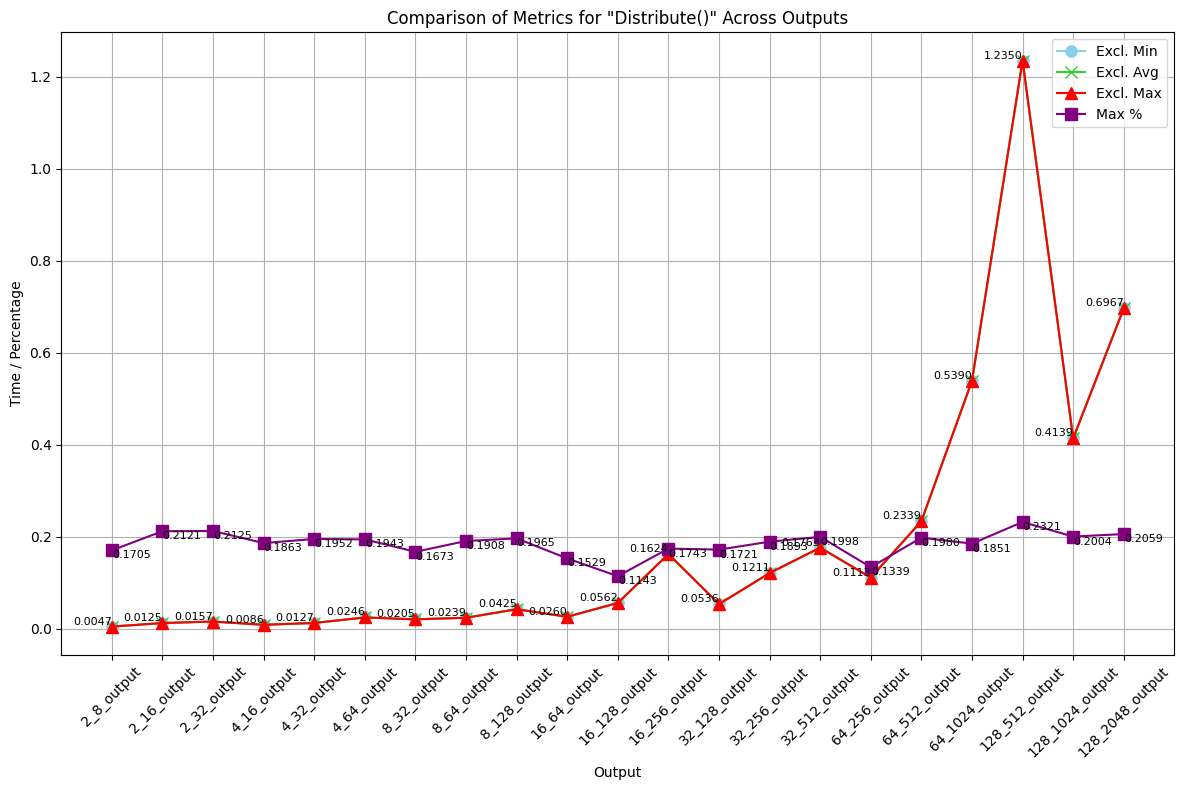

In [ ]:
main_data = excl_data[excl_data['Name'] == 'Distribute()'].copy()  
main_data.loc[:, 'Excl. Min'] = pd.to_numeric(main_data['Excl. Min'], errors='coerce')
main_data.loc[:, 'Excl. Avg'] = pd.to_numeric(main_data['Excl. Avg'], errors='coerce')
main_data.loc[:, 'Excl. Max'] = pd.to_numeric(main_data['Excl. Max'], errors='coerce')
main_data.loc[:, 'Max %'] = pd.to_numeric(main_data['Max %'], errors='coerce')

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))
    plt.plot(main_data['Output'], main_data['Excl. Min'], marker='o', label='Excl. Min', color='skyblue', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Avg'], marker='x', label='Excl. Avg', color='limegreen', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Max'], marker='^', label='Excl. Max', color='red', markersize=8)
    plt.plot(main_data['Output'], main_data['Max %'], marker='s', label='Max %', color='purple', markersize=8)


    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Excl. Avg'].iloc[i], 
                 f"{main_data['Excl. Avg'].iloc[i]:.4f}", fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Max %'].iloc[i], 
                 f"{main_data['Max %'].iloc[i]:.4f}", fontsize=8, verticalalignment='top', horizontalalignment='left')


    plt.title('Comparison of Metrics for "Distribute()" Across Outputs')
    plt.xlabel('Output')
    plt.ylabel('Time / Percentage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()


    plt.show()


plot_main_metrics(main_data)

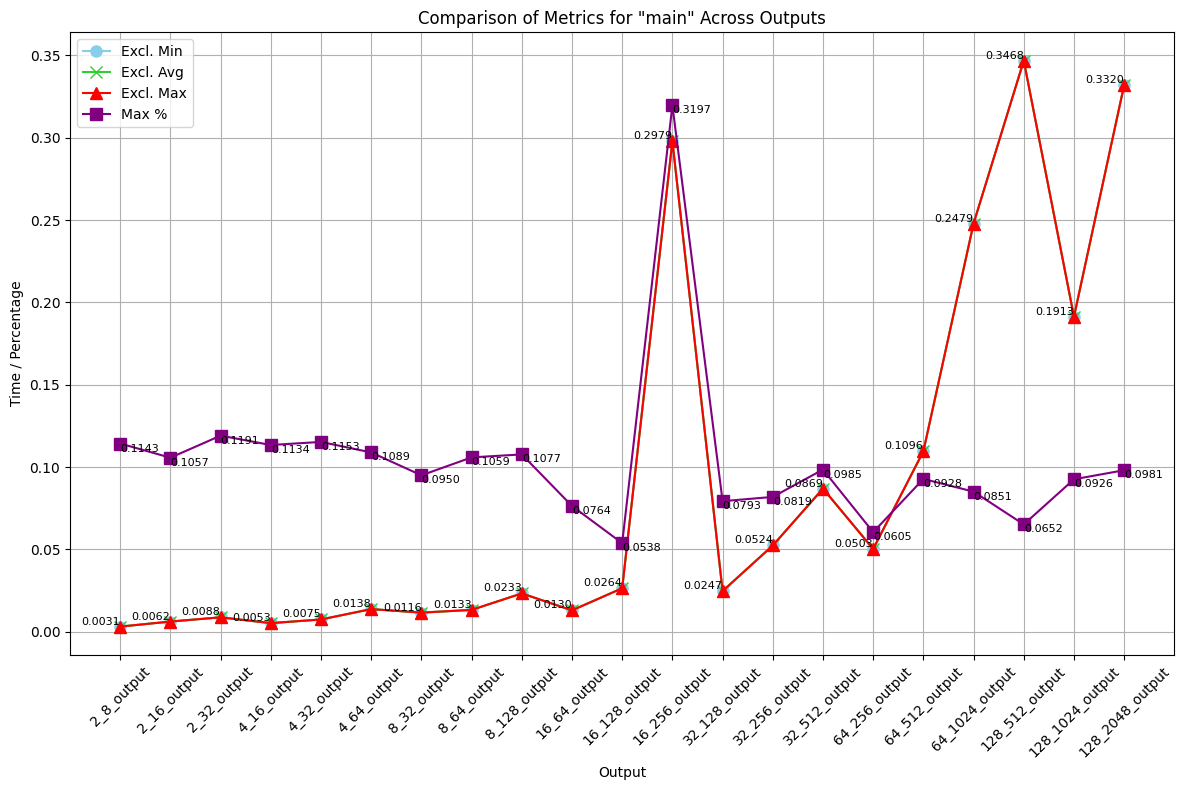

In [ ]:
main_data = excl_data[excl_data['Name'] == 'main'].copy()  
main_data.loc[:, 'Excl. Min'] = pd.to_numeric(main_data['Excl. Min'], errors='coerce')
main_data.loc[:, 'Excl. Avg'] = pd.to_numeric(main_data['Excl. Avg'], errors='coerce')
main_data.loc[:, 'Excl. Max'] = pd.to_numeric(main_data['Excl. Max'], errors='coerce')
main_data.loc[:, 'Max %'] = pd.to_numeric(main_data['Max %'], errors='coerce')

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))
    plt.plot(main_data['Output'], main_data['Excl. Min'], marker='o', label='Excl. Min', color='skyblue', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Avg'], marker='x', label='Excl. Avg', color='limegreen', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Max'], marker='^', label='Excl. Max', color='red', markersize=8)
    plt.plot(main_data['Output'], main_data['Max %'], marker='s', label='Max %', color='purple', markersize=8)


    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Excl. Avg'].iloc[i], 
                 f"{main_data['Excl. Avg'].iloc[i]:.4f}", fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Max %'].iloc[i], 
                 f"{main_data['Max %'].iloc[i]:.4f}", fontsize=8, verticalalignment='top', horizontalalignment='left')


    plt.title('Comparison of Metrics for "main" Across Outputs')
    plt.xlabel('Output')
    plt.ylabel('Time / Percentage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()


    plt.show()


plot_main_metrics(main_data)

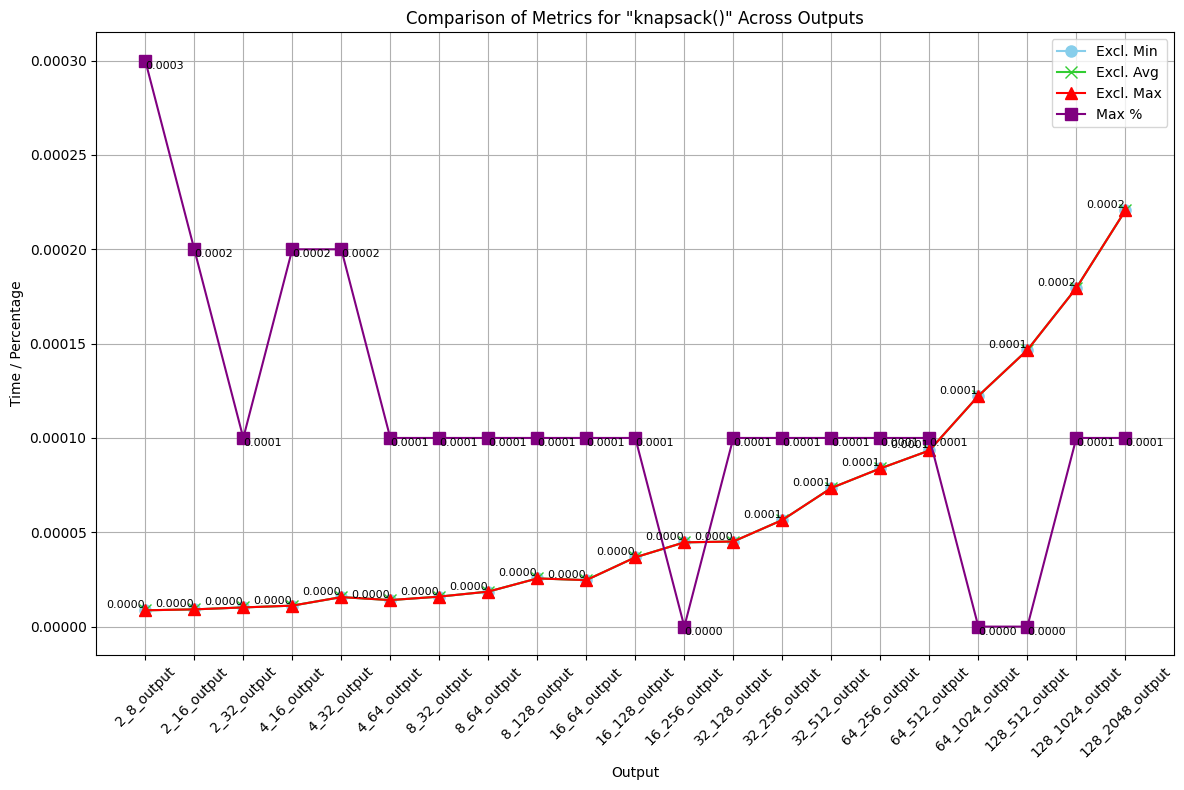

In [ ]:
main_data = excl_data[excl_data['Name'] == 'knapsack()'].copy()  
main_data.loc[:, 'Excl. Min'] = pd.to_numeric(main_data['Excl. Min'], errors='coerce')
main_data.loc[:, 'Excl. Avg'] = pd.to_numeric(main_data['Excl. Avg'], errors='coerce')
main_data.loc[:, 'Excl. Max'] = pd.to_numeric(main_data['Excl. Max'], errors='coerce')
main_data.loc[:, 'Max %'] = pd.to_numeric(main_data['Max %'], errors='coerce')

def plot_main_metrics(main_data):
    plt.figure(figsize=(12, 8))
    plt.plot(main_data['Output'], main_data['Excl. Min'], marker='o', label='Excl. Min', color='skyblue', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Avg'], marker='x', label='Excl. Avg', color='limegreen', markersize=8)
    plt.plot(main_data['Output'], main_data['Excl. Max'], marker='^', label='Excl. Max', color='red', markersize=8)
    plt.plot(main_data['Output'], main_data['Max %'], marker='s', label='Max %', color='purple', markersize=8)


    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Excl. Avg'].iloc[i], 
                 f"{main_data['Excl. Avg'].iloc[i]:.4f}", fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    for i in range(len(main_data)):
        plt.text(main_data['Output'].iloc[i], main_data['Max %'].iloc[i], 
                 f"{main_data['Max %'].iloc[i]:.4f}", fontsize=8, verticalalignment='top', horizontalalignment='left')


    plt.title('Comparison of Metrics for "knapsack()" Across Outputs')
    plt.xlabel('Output')
    plt.ylabel('Time / Percentage')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()


    plt.show()


plot_main_metrics(main_data)